# Proyek Akhir: Menyelesaikan Permasalahan Drancang Company

- Nama: Muhammad Kristover Armand
- Email: mkarmand43@gmail.com
- Id Dicoding: mk_armand_13

**Menyiapkan library yang dibutuhkan**

---



In [1]:
# Import library yang diperlukan
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Menyiapkan data yang akan diguankan**

In [2]:
# 1. Load data
df = pd.read_csv("data.csv")
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

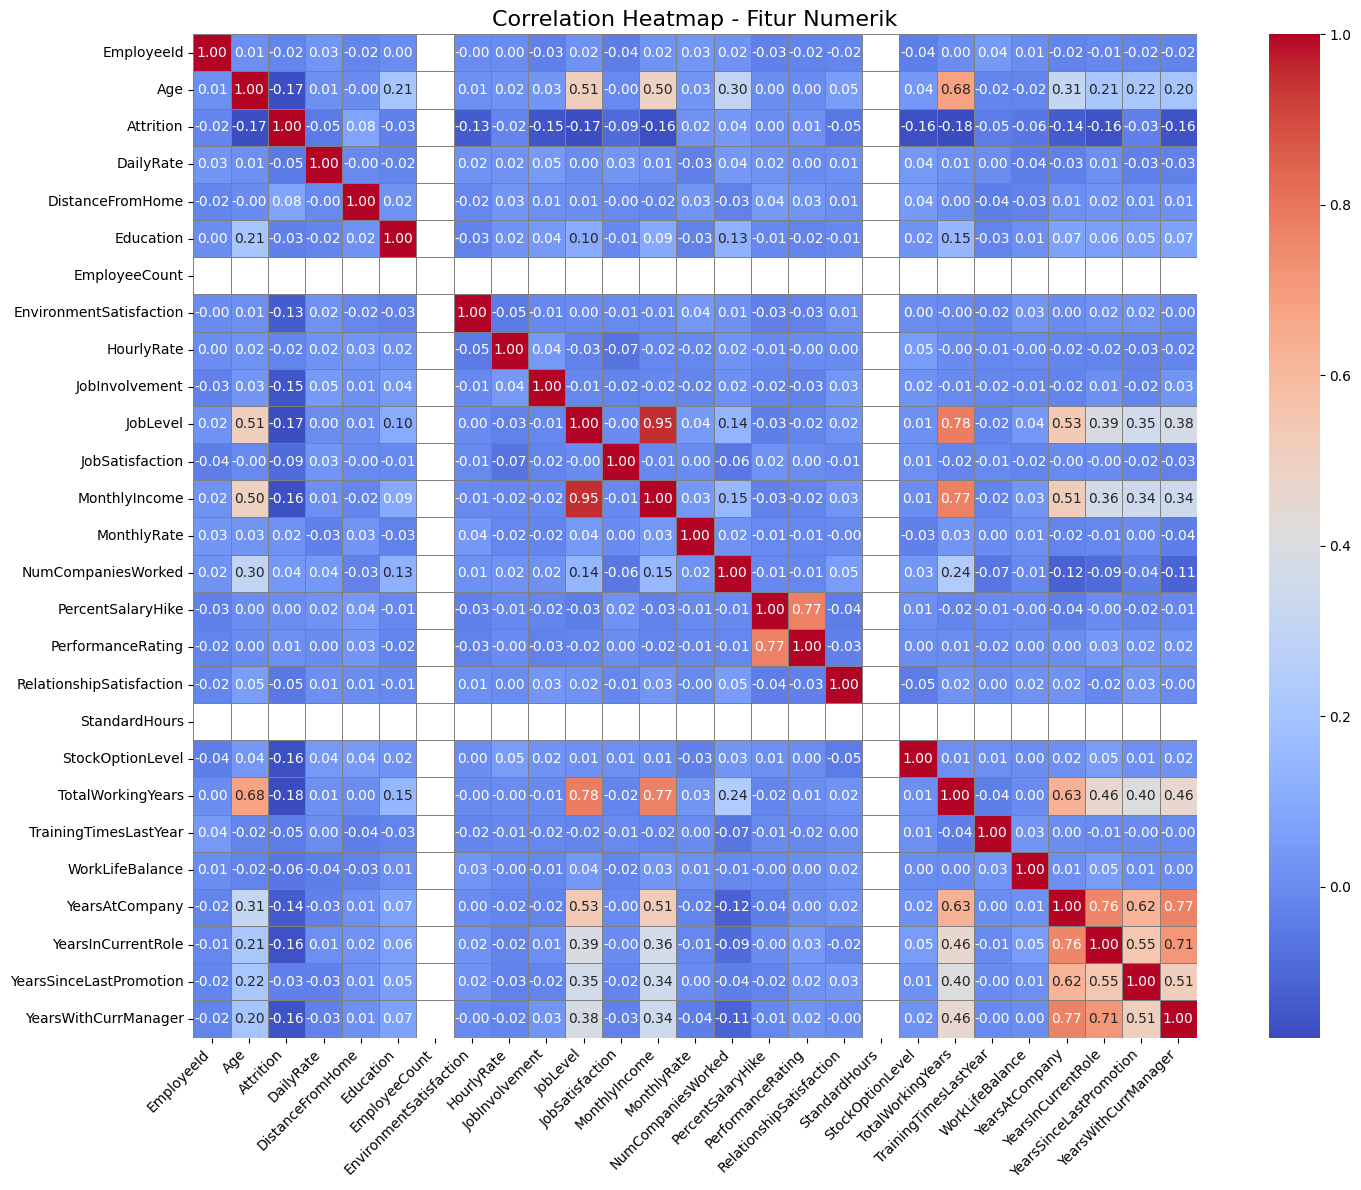

In [4]:
# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Create the numerical_df
numerical_df = df[numerical_cols]

plt.figure(figsize=(16, 12))  # Perbesar area plot
sns.heatmap(numerical_df.corr(),
            annot=True,            # Tampilkan angka korelasi
            fmt=".2f",             # Dua angka desimal
            cmap='coolwarm',       # Skema warna
            cbar=True,             # Tampilkan colorbar
            square=True,           # Kotak per sel
            linewidths=0.5,        # Garis antar sel
            linecolor='gray')      # Warna garis antar sel

plt.title('Correlation Heatmap - Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Putar label X
plt.yticks(rotation=0)               # Label Y tetap horizontal
plt.tight_layout()
plt.show()


<Figure size 1800x1500 with 0 Axes>

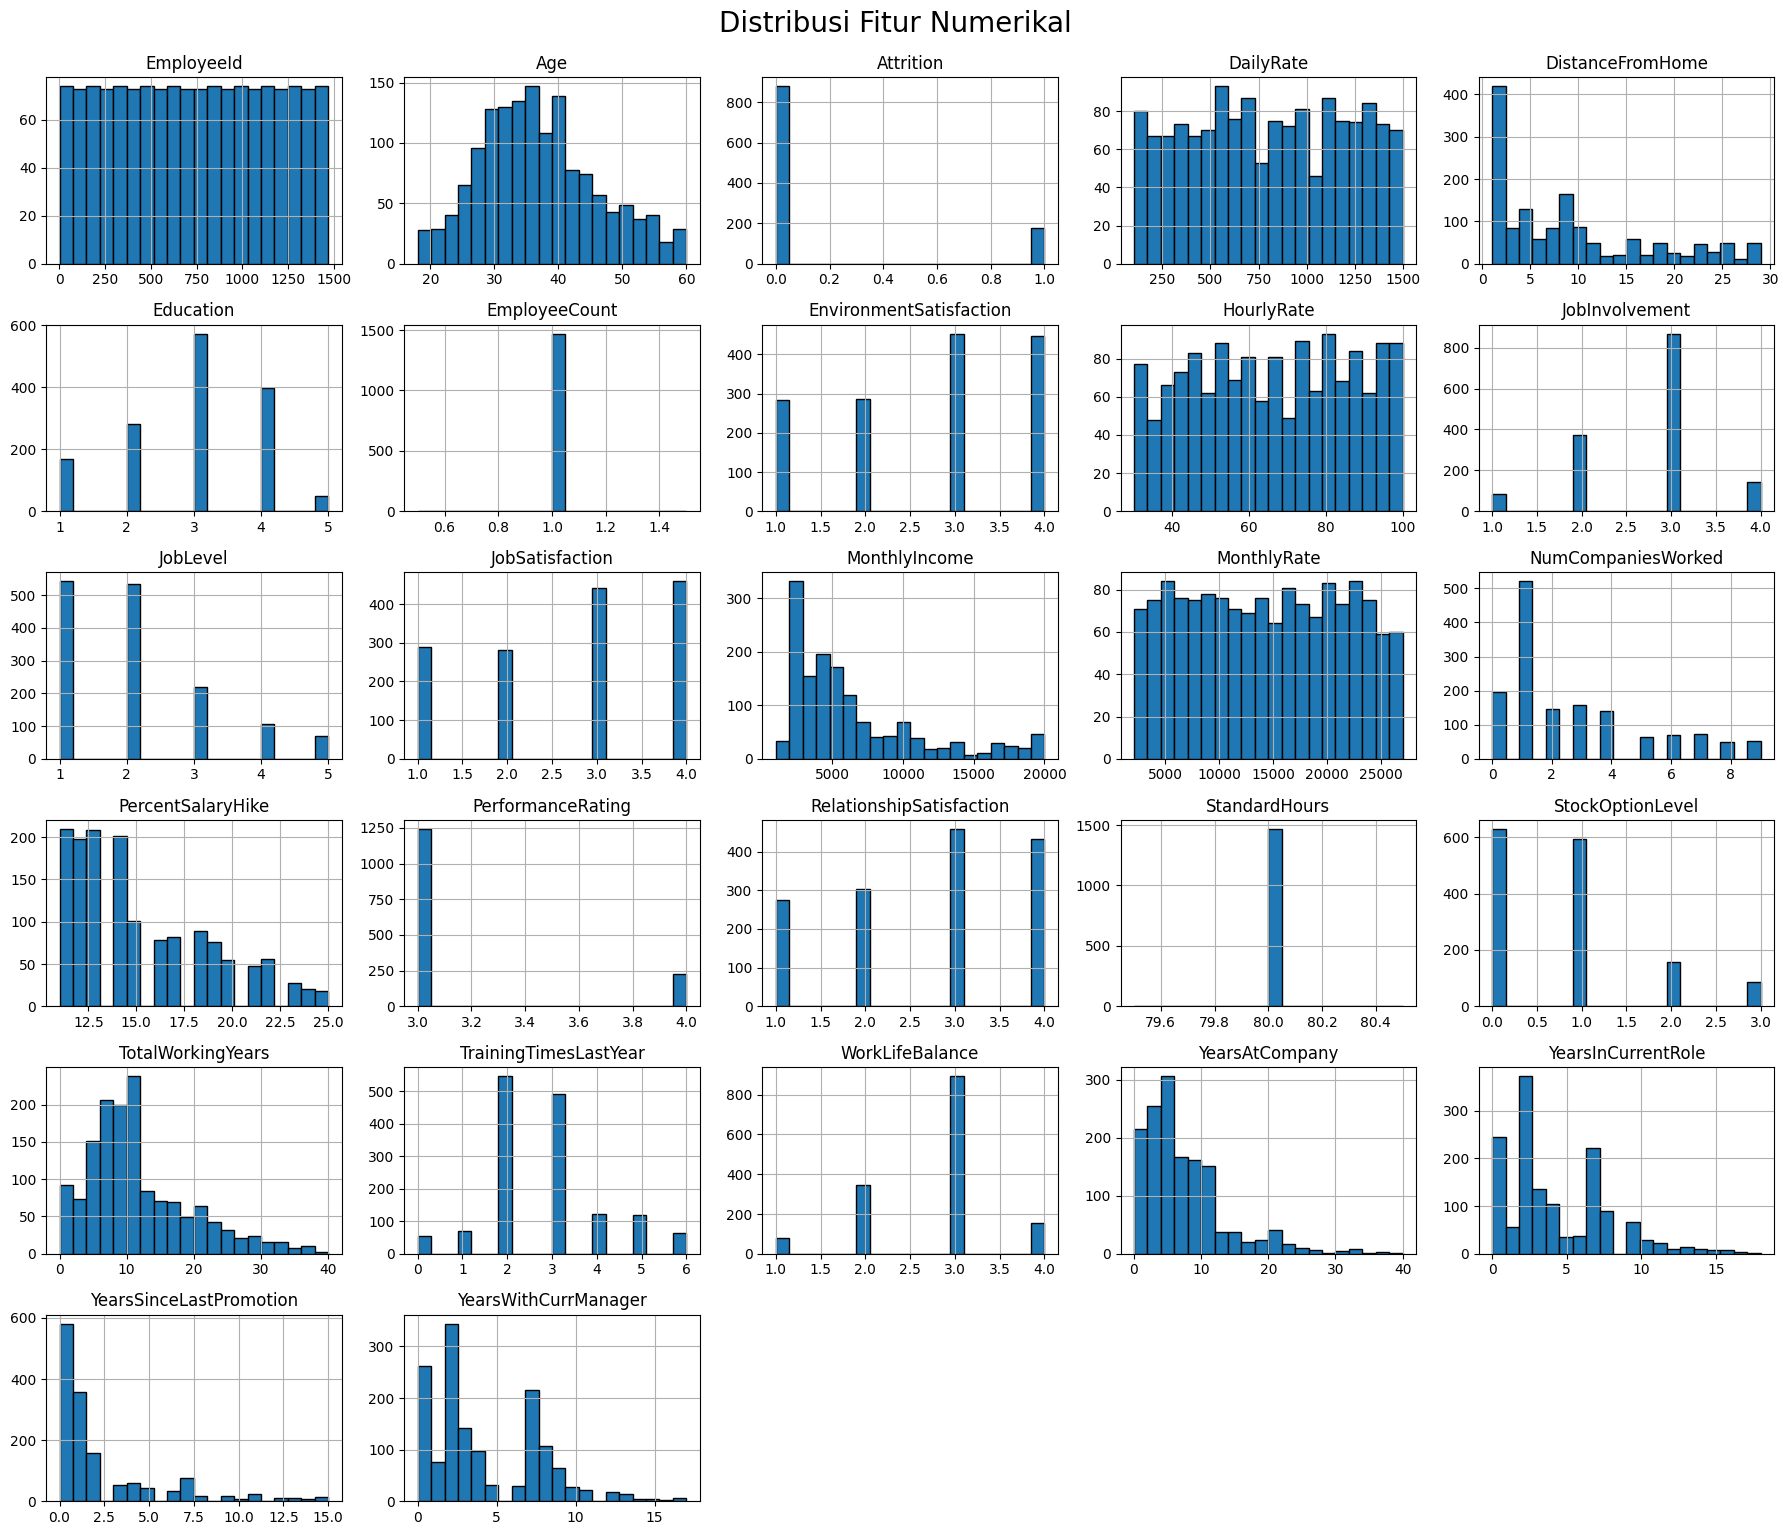

In [5]:
# Tentukan ukuran figure dan grid
plt.figure(figsize=(18, 15))
df[numerical_cols].hist(bins=20, layout=(6, 5), figsize=(18, 15), edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerikal", fontsize=20, y=1.02)
plt.show()


In [6]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tampilkan nilai minimum dan maksimum
df[numerical_cols].agg(['min', 'max'])


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
min,1,18,0.0,102,1,1,1,1,30,1,...,1,80,0,0,0,1,0,0,0,0
max,1470,60,1.0,1499,29,5,1,4,100,4,...,4,80,3,40,6,4,40,18,15,17


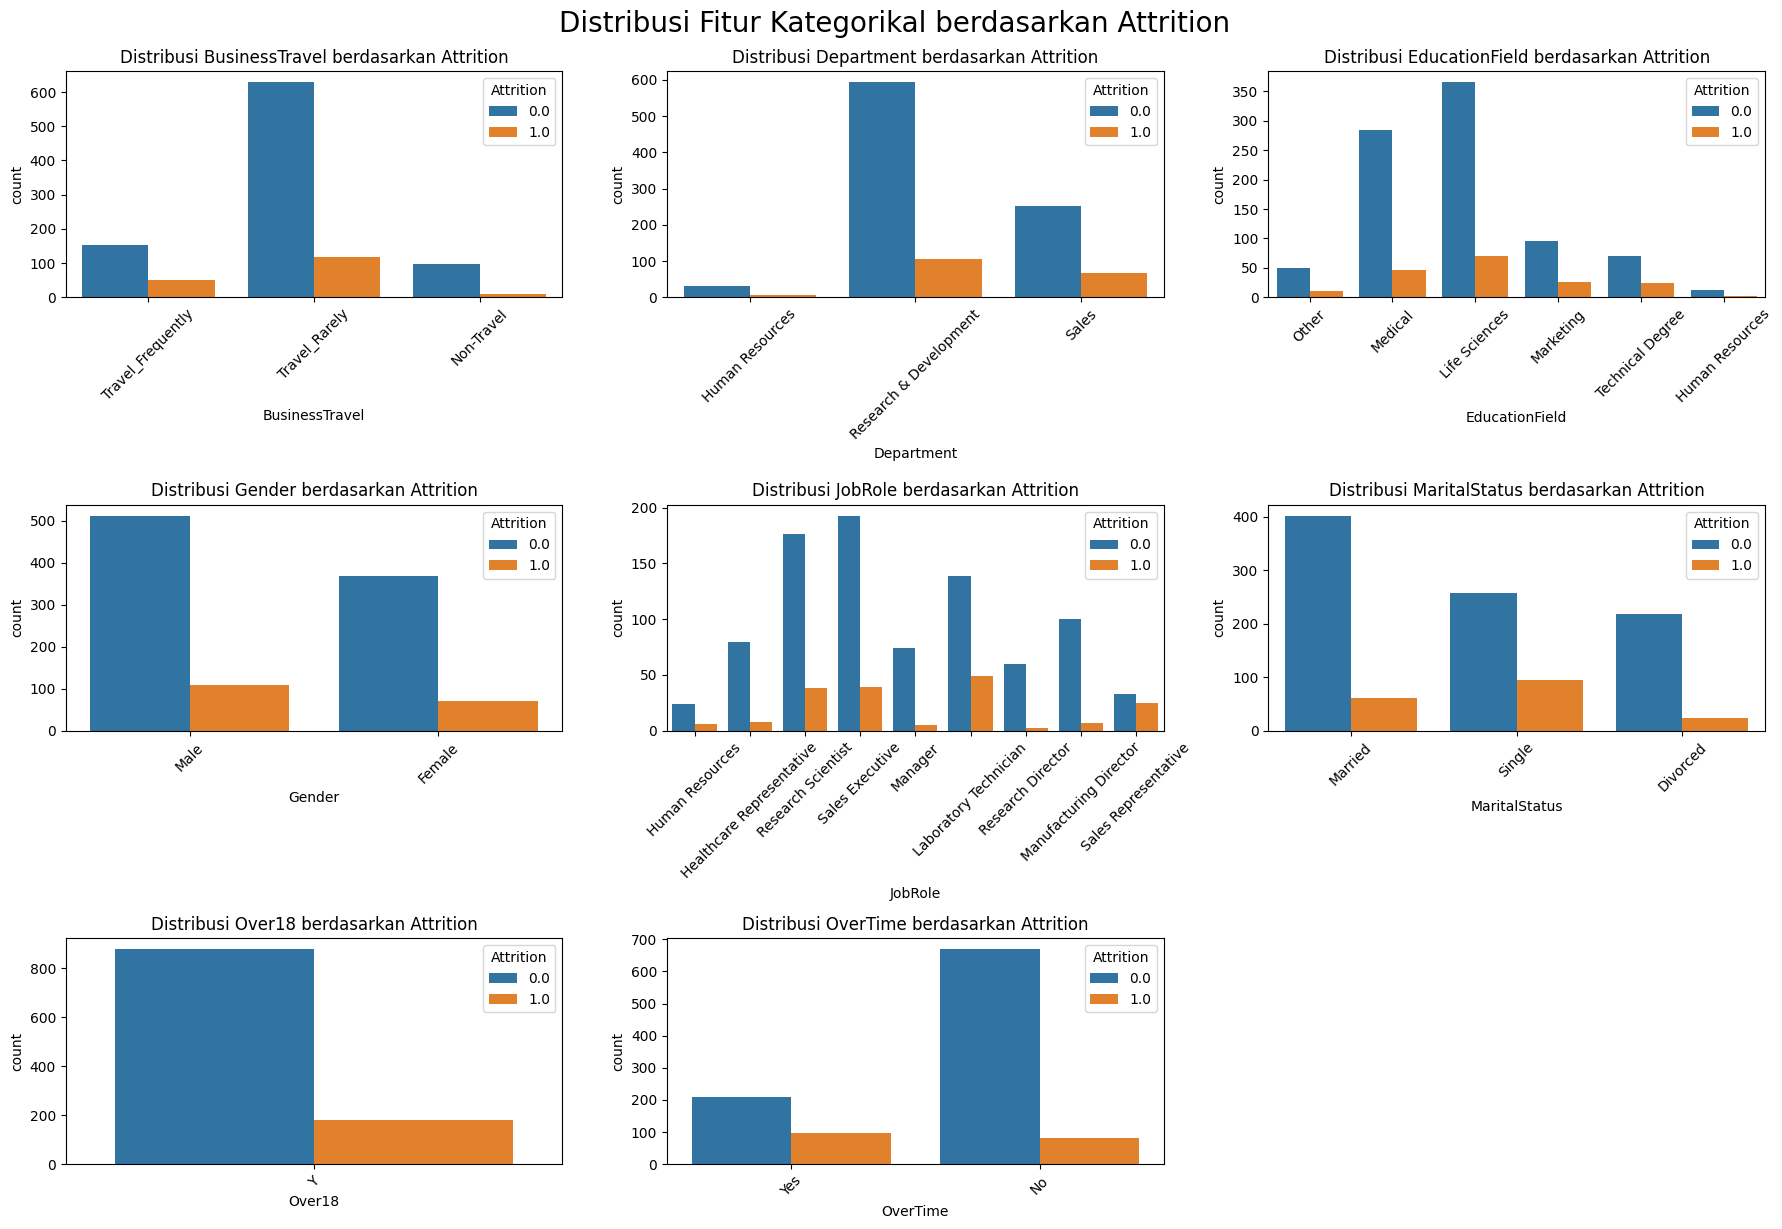

In [7]:
import math

# Ambil semua kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Hitung jumlah baris dan kolom grid
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Buat figure besar
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Plot semua fitur dalam grid
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Attrition', data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col} berdasarkan Attrition')
    axes[i].tick_params(axis='x', rotation=45)

# Sembunyikan subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribusi Fitur Kategorikal berdasarkan Attrition", fontsize=20, y=1.02)
plt.show()


# Data Preparation / Preprocessing

In [8]:
# 2. Salin data untuk diproses
data = df.copy()

# 3. Pisahkan data berlabel dan tidak berlabel
train_data = data[data['Attrition'].notna()].copy()
predict_data = data[data['Attrition'].isna()].copy()

# 4. Ubah kolom Attrition ke integer
train_data['Attrition'] = train_data['Attrition'].astype(int)

In [9]:
# 5. Tentukan kolom yang tidak diperlukan
drop_cols = ['EmployeeCount', 'StandardHours', 'EmployeeId', 'Over18']
X = train_data.drop(columns=['Attrition'] + drop_cols)
y = train_data['Attrition']

In [10]:
# 6. Encode fitur kategorikal
encoder = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoder[col] = le



In [11]:
# Siapkan data prediksi
X_pred = predict_data.drop(columns=['Attrition'] + drop_cols)
for col in X_pred.select_dtypes(include='object').columns:
    if col in encoder:
        le = encoder[col]
        X_pred[col] = X_pred[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [12]:
# Pastikan tidak ada kolom bertipe object
assert X_pred.select_dtypes(include='object').empty, "Masih ada kolom object di X_pred!"

In [13]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split data balanced
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [14]:
# # 8. Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Modeling

In [15]:
# 9. Latih model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluasi

In [16]:
# Prediksi pada data uji
y_pred_test = model.predict(X_test)
# Akurasi
accuracy = accuracy_score(y_test, y_pred_test)
print("Akurasi:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Akurasi: 0.9176136363636364
Confusion Matrix:
 [[164  14]
 [ 15 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       178
           1       0.92      0.91      0.92       174

    accuracy                           0.92       352
   macro avg       0.92      0.92      0.92       352
weighted avg       0.92      0.92      0.92       352



In [17]:
predicted_attrition = model.predict(X_pred)
predict_data['Predicted_Attrition'] = predicted_attrition
train_data['Predicted_Attrition'] = train_data['Attrition']

# Gabungkan semua data
final_df = pd.concat([train_data, predict_data], axis=0)

# Isi nilai kosong di kolom Attrition
final_df['Attrition'] = final_df['Attrition'].fillna(final_df['Predicted_Attrition'])


In [18]:
final_df.to_csv("data_filled.csv", index=False)
joblib.dump(model, 'model.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("✅ Proses selesai! File disimpan: model.pkl, data_filled.csv")

✅ Proses selesai! File disimpan: model.pkl, data_filled.csv
